ERP CHALLENGES

In [2]:
import numpy as np                  # Import functions for calculations.
import matplotlib.pyplot as plt     # Import functions for plotting
from scipy.io import loadmat        # Import function to read data.

data = loadmat('EEG-2.mat')   

In [3]:
data.keys() #EEGa (electrode 1), EEGb (electrode 2), t (time)

dict_keys(['__header__', '__version__', '__globals__', 't', 'EEG'])

In [7]:
t = data['t'][0]
EEG2 = data['EEG']

In [8]:
print('Shape of EEG from EEG2.mat is', np.shape(EEG2))

Shape of EEG from EEG2.mat is (1000, 500)


In [10]:
ntrials2 = np.shape(EEG2)[0]
print('The number of trials in EEG2.mat is ', ntrials2)

nsamples2 = np.shape(EEG2)[1]
print("The number of samples in EEG2.mat is", nsamples2)

The number of trials in EEG2.mat is  1000
The number of samples in EEG2.mat is 500


Text(0.5, 1.0, 'Variable T')

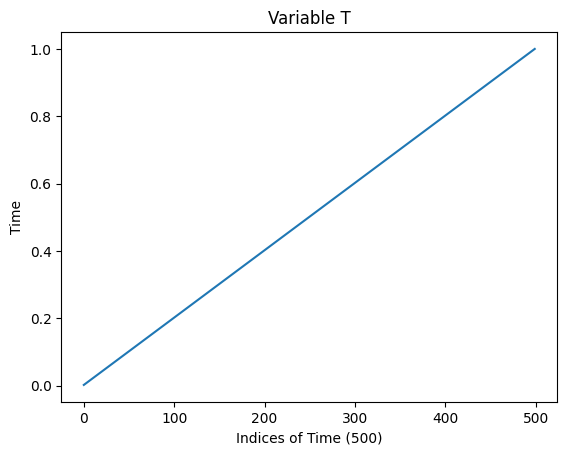

In [12]:
plt.figure()
plt.plot(t)
plt.ylabel('Time')
plt.xlabel('Indices of Time (500)')
plt.title('Variable T')

In [16]:
# a. What is the time between samples (dt) in seconds?
dt = t[1] - t[0]
print('The time between samples in seconds is', dt)

The time between samples in seconds is 0.002


 b. Examine these data. Explain what you observe in pictures and words. From your visual inspection, do you expect to find an ERP in these data?

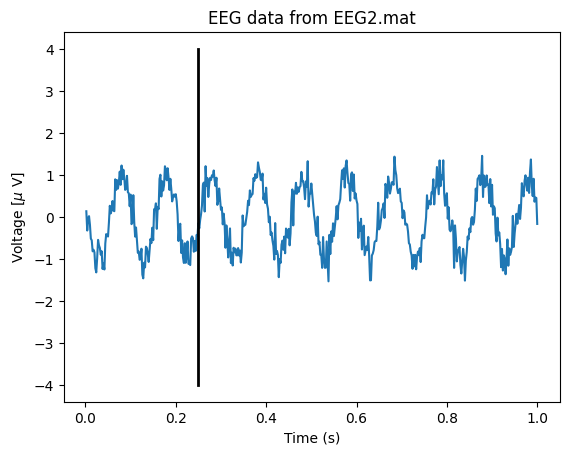

In [17]:
plt.clf()
plt.plot(t, EEG2[0,:])                               # Plot something useful.
plt.xlabel('Time (s)')                             # Label the x-axis ...
plt.ylabel('Voltage [$\mu$ V]')                             # Label the y-axis ...
plt.title('EEG data from EEG2.mat')                              # Add a title ...
plt.plot([0.25, 0.25], [-4,4], 'k', lw=2)   # Add a vertical line to indicate the stimulus time

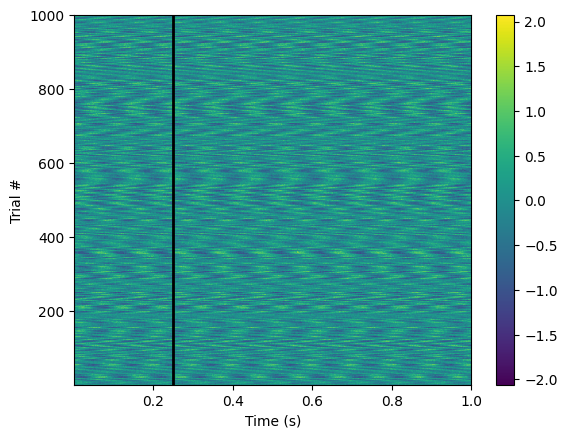

In [19]:
plt.imshow(EEG2,                             # Make an *image* of something useful
           extent=[t[0], t[-1], 1, ntrials2],# ... with nice x-limits. 
           aspect='auto',                   # ... set aspect ratio 
           origin='lower')                  # ... put origin in lower left corner
plt.xlabel('Time (s)')                             # Label the axes
plt.ylabel('Trial #')
plt.colorbar()                              # Show voltage to color mapping
plt.vlines(0.25, 1, 1000, 'k', lw=2)        # Indicate stimulus onset with line
plt.show()

 C. Compute the ERP for these data, and plot the results. Do you observe an ERP (i.e., times at which the 95% confidence intervals do not include zero)? Include 95% confidence intervals in your ERP plot, and label the axes. 

In [21]:
ERP2 = np.mean(EEG2,0)

Text(0.5, 1.0, 'ERP of EEG2.mat')

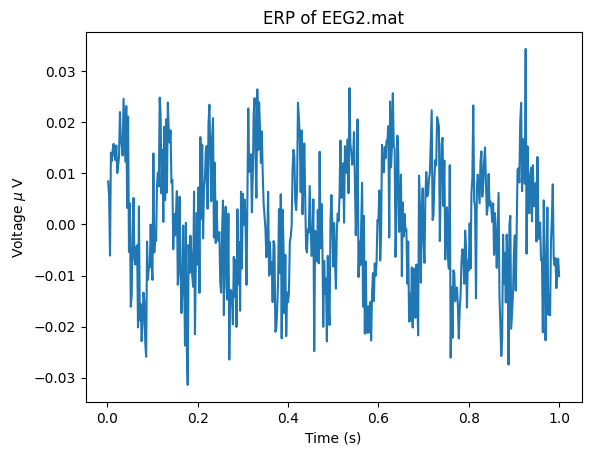

In [22]:
#c.	
plt.plot(t, ERP2)                               # Plot the ERP for each condition.
plt.xlabel('Time (s)')                                 # ... label the axes
plt.ylabel('Voltage $\mu$ V')             
plt.title('ERP of EEG2.mat')                                  # ... provide a title


In [27]:
sd2 = np.std(EEG2, 0) #compute the std across trials
print(sd2[0])
mn2 = EEG2.mean(0) #this is the mean across trials

0.738977040740755


In [28]:
sdmn2 = sd2/np.sqrt(ntrials2) #compute the std of the mean

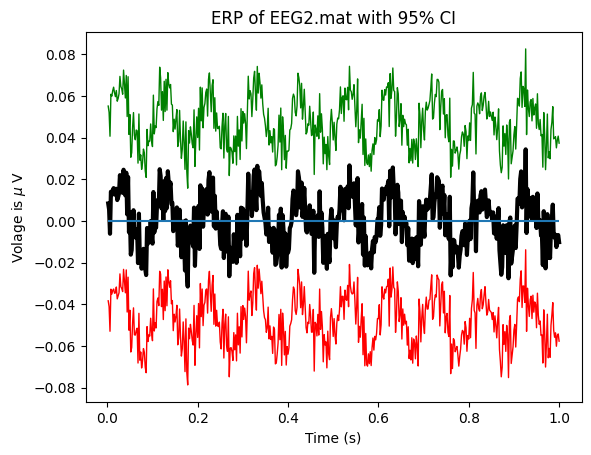

In [33]:
plt.plot(t, mn2, 'k', lw=3) #plots the values from the t array on the x-axis and the mn2 values on the y-axis, k makes it black?
plt.plot(t, mn2 + 2 * sdmn2, 'g', lw=1) #upper CI
plt.plot(t, mn2 - 2 * sdmn2, 'r', lw=1) #lower CI 
plt.xlabel('Time (s)')
plt.ylabel('Volage is $\mu$ V')
plt.title('ERP of EEG2.mat with 95% CI')
plt.hlines(0, t[0], t[-1]); #line at y =0 that represents 0 voltage

Explain in a few sentences the results of your analysis, as you would to a collaborator who collected these data:
